# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Loading The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_40k.csv')
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    40000 non-null  object 
 1   Title        39984 non-null  object 
 2   userId       40000 non-null  object 
 3   Helpfulness  40000 non-null  object 
 4   Score        40000 non-null  float64
 5   Time         40000 non-null  int64  
 6   Text         40000 non-null  object 
 7   Cat1         40000 non-null  object 
 8   Cat2         40000 non-null  object 
 9   Cat3         40000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ MB


# Text Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [ ]:
def clean_review(review_text):
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    review_text = str(review_text).lower()
    review_text = word_tokenize(review_text)
    review_text = [item for item in review_text if item not in stop_words]
    review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
    review_text = [i for i in review_text if len(i) > 2]
    review_text = ' '.join(review_text)
    review_text = ''.join((item for item in review_text if not item.isdigit()))
    return review_text 

In [ ]:
df['clean_text'] = df['Text'].apply(clean_review)

In [ ]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,description photo product need change indicate...
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,great book well think easily imagine events ha...
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown,first year teacher teach grade special read cl...
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown,get book bookfair school look something summer...
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...


In [ ]:
!pip install Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

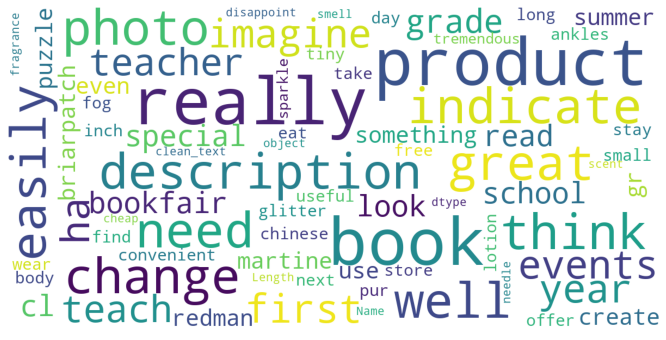

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show() 
Mywordcloud(df['clean_text'].dropna())   

In [ ]:
df['clean_text']

0        description photo product need change indicate...
1        great book well think easily imagine events ha...
2        first year teacher teach grade special read cl...
3        get book bookfair school look something summer...
4        martine redman create puzzle briarpatch use gr...
                               ...                        
39995    even convenient find really small store tiny a...
39996    wear next day eat chinese take ankles inch pur...
39997    product really stay fog free long useful could...
39998    glitter body lotion offer tremendous sparkle a...
39999    disappoint scent fragrance smell cheap needle ...
Name: clean_text, Length: 40000, dtype: object

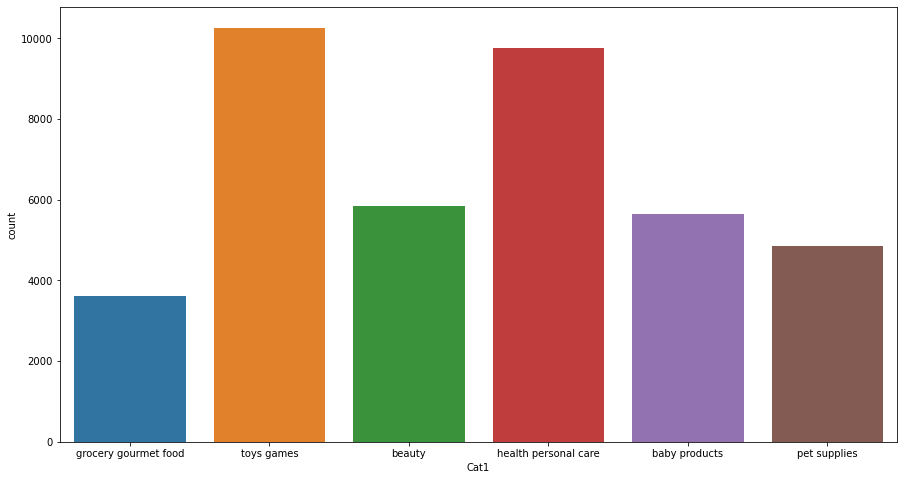

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(df['Cat1'])

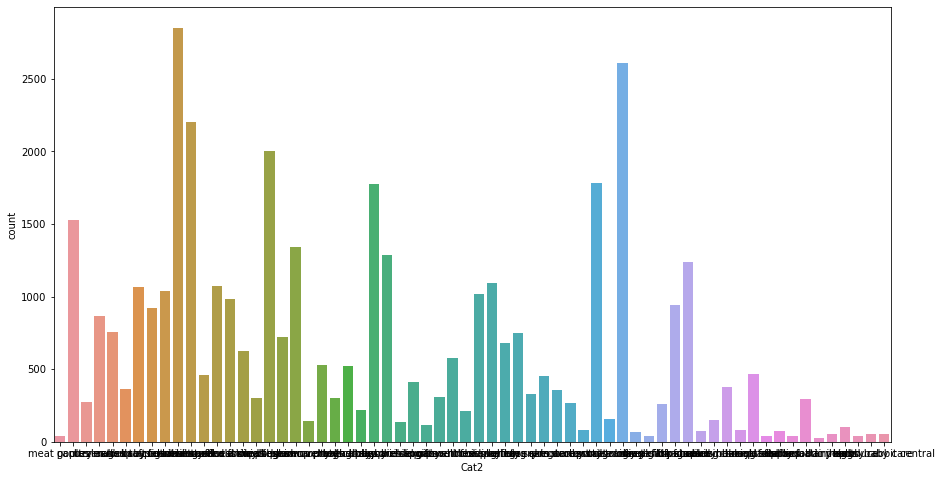

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Cat2'])

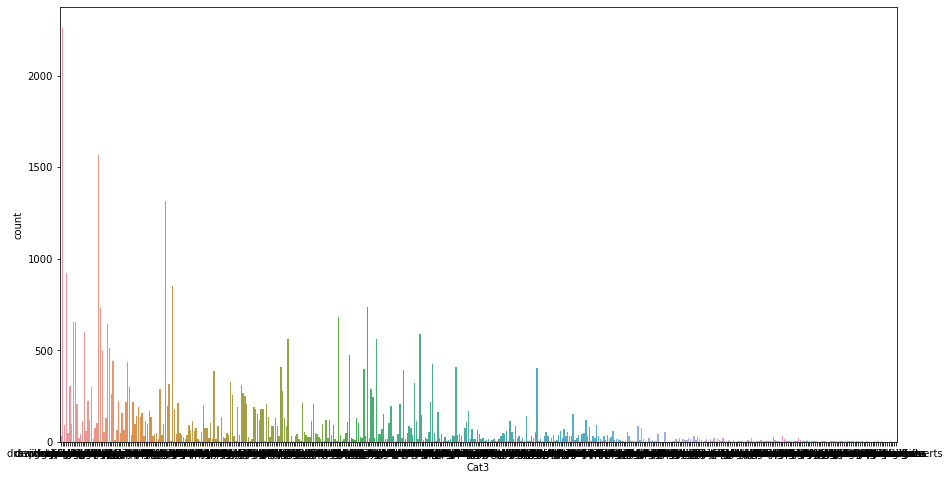

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Cat3'])

# So for further analysis and model building we will use clean_text as independant column and Cat1 as dependant column.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
from collections import Counter

Class=2, n=3617 (9.043%)
Class=5, n=10266 (25.665%)
Class=1, n=5846 (14.615%)
Class=3, n=9772 (24.430%)
Class=0, n=5637 (14.092%)
Class=4, n=4862 (12.155%)


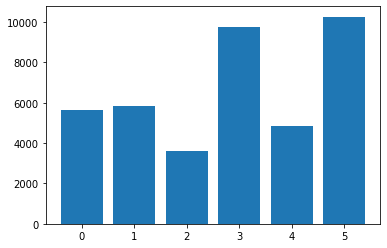

In [ ]:
import  matplotlib.pyplot as plt
data = df.values
# split into input and output elements
X = df['clean_text'] 
y = df['Cat1']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
!pip install six

In [ ]:
!pip install imblearn

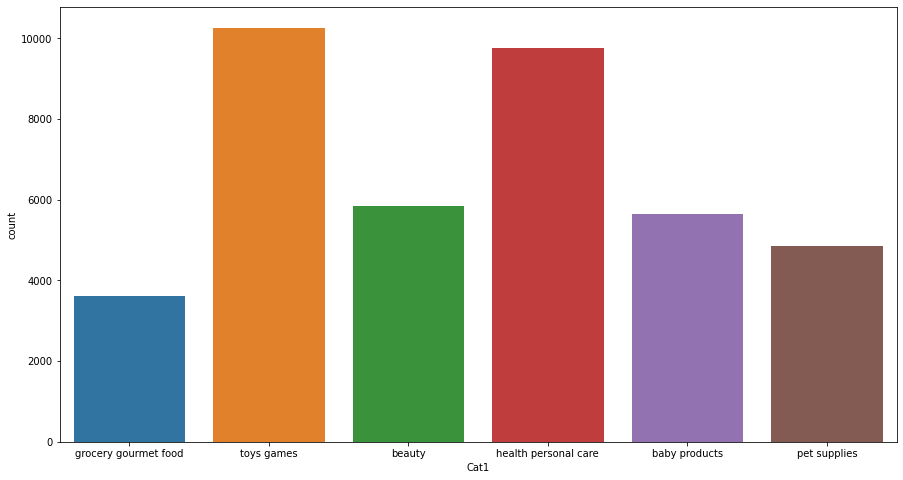

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(df['Cat1'])

# Label Encoder - 

*   To convert target [categorical] column to numerical column,  by using Label Encoder.



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Cat1'] =le.fit_transform(df['Cat1'])

In [ ]:
df.head(10)

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,2,meat poultry,jerky,description photo product need change indicate...
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,5,games,unknown,great book well think easily imagine events ha...
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",5,games,unknown,first year teacher teach grade special read cl...
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,5,games,unknown,get book bookfair school look something summer...
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,5,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...
5,B00000DMER,ThinkFun Rush Hour,unknown,2/2,5.0,912816000,"My eight year old loves this game, whenever he...",5,games,board games,eight year old love game whenever coax away fa...
6,B00004RYGX,Beetle Juice (1988),unknown,1/1,4.0,918000000,The real joy of this movie doesn't lie in its ...,2,beverages,juices,real joy movie lie fun special effect twist al...
7,B00004CI84,Beetle Juice [VHS] (1988),unknown,1/6,3.0,928108800,"Okay, Tim Burton is genuine. He haunts you wit...",2,beverages,juices,okay tim burton genuine haunt film wood edward...
8,B0007URYFM,Boundaries,unknown,2/2,5.0,931046400,"Boundaries, along with counseling, has given m...",1,makeup,nails,boundaries along counsel give tool work toward...
9,B00000J0NT,Crayola 120ct Original Crayons,unknown,9/9,5.0,931219200,120 colors? I say 120 sticks of fun! And a fre...,5,arts crafts,drawing painting supplies,color say stick fun free sharpener shave holde...


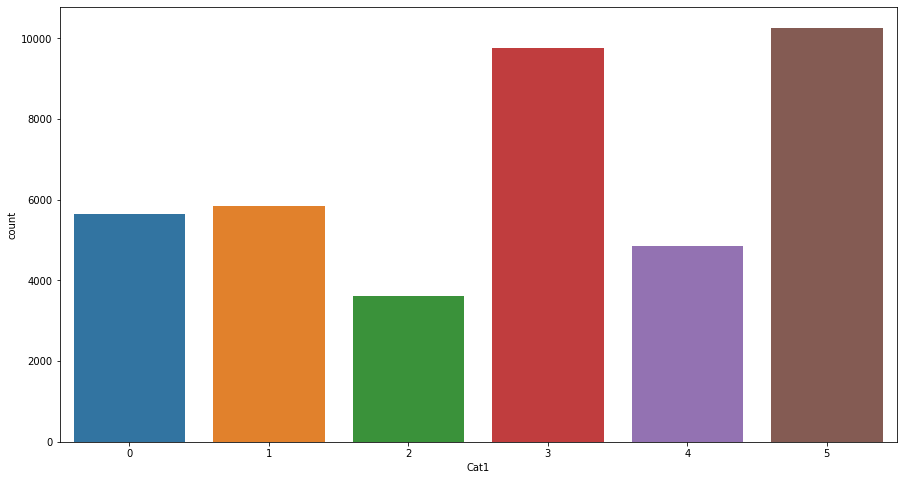

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(df['Cat1'])

In [ ]:
df[["Text", "clean_text"]].head(10)

,Text,clean_text
0,The description and photo on this product need...,description photo product need change indicate...
1,This was a great book!!!! It is well thought t...,great book well think easily imagine events ha...
2,"I am a first year teacher, teaching 5th grade....",first year teacher teach grade special read cl...
3,I got the book at my bookfair at school lookin...,get book bookfair school look something summer...
4,Hi! I'm Martine Redman and I created this puzz...,martine redman create puzzle briarpatch use gr...
5,"My eight year old loves this game, whenever he...",eight year old love game whenever coax away fa...
6,The real joy of this movie doesn't lie in its ...,real joy movie lie fun special effect twist al...
7,"Okay, Tim Burton is genuine. He haunts you wit...",okay tim burton genuine haunt film wood edward...
8,"Boundaries, along with counseling, has given m...",boundaries along counsel give tool work toward...
9,120 colors? I say 120 sticks of fun! And a fre...,color say stick fun free sharpener shave holde...


In [ ]:
df['Cat1'].value_counts()

5    10266
3     9772
1     5846
0     5637
4     4862
2     3617
Name: Cat1, dtype: int64

In [ ]:
new_df = pd.DataFrame(df[['Cat1','clean_text']])

new_df.head()

,Cat1,clean_text
0,2,description photo product need change indicate...
1,5,great book well think easily imagine events ha...
2,5,first year teacher teach grade special read cl...
3,5,get book bookfair school look something summer...
4,5,martine redman create puzzle briarpatch use gr...


In [ ]:
df0 = new_df[new_df['Cat1'] == 0]
df1 = new_df[new_df['Cat1'] == 1]
df2 = new_df[new_df['Cat1'] == 2]
df3 = new_df[new_df['Cat1'] == 3]
df4 = new_df[new_df['Cat1'] == 4]
df5 = new_df[new_df['Cat1'] == 5]

In [ ]:
df_word = pd.concat([df0,df1,df2,df3,df4,df5], axis=0)

In [ ]:
df_word

,Cat1,clean_text
62,0,buy toy baby begin newborn care less figure sp...
281,0,wonderful creation let baby toddler picture ne...
308,0,great son love since christmas first get month...
327,0,give daughter months old fill photos grandpare...
406,0,best liners baby easy handle easy fill durable...
...,...,...
39955,5,get see friend buy year old month old enjoy sh...
39962,5,easy tell real lighter stupid drink people mig...
39968,5,unfortunately raft hold old use handful time h...
39970,5,fairly difficult puzzle try match many face wa...


In [ ]:
df_w = pd.read_csv('in.csv')

In [ ]:
df0 = df_w[new_df['Cat1'] == 0]
df1 = df_w[new_df['Cat1'] == 1]
df2 = df_w[new_df['Cat1'] == 2]
df3 = df_w[new_df['Cat1'] == 3]
df4 = df_w[new_df['Cat1'] == 4]
df5 = df_w[new_df['Cat1'] == 5]

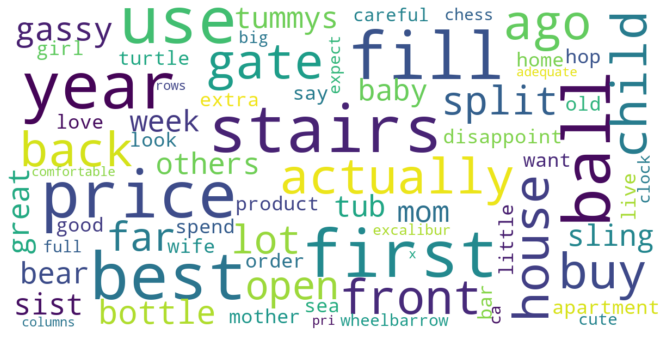

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
Mywordcloud([df0])  

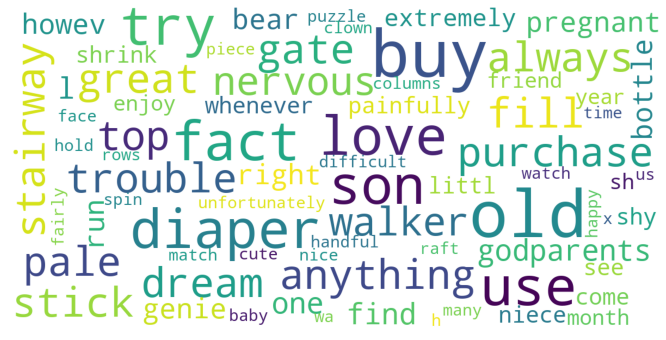

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show() 
Mywordcloud(df1) 

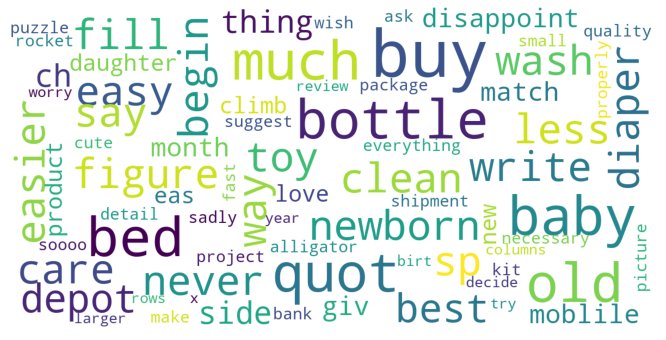

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show() 
Mywordcloud([df2]) 

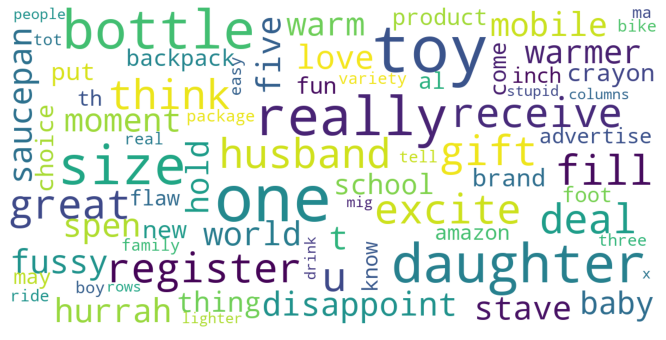

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show() 
Mywordcloud([df3]) 

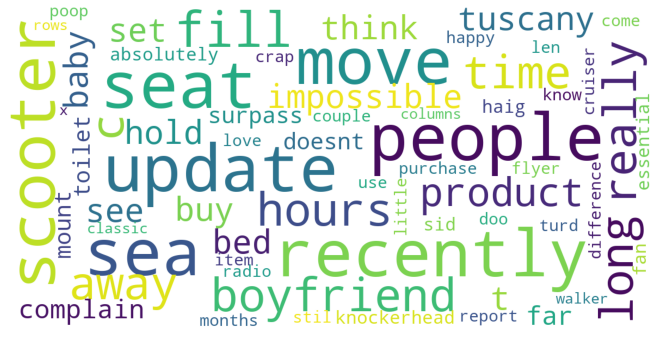

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show() 
Mywordcloud([df4]) 

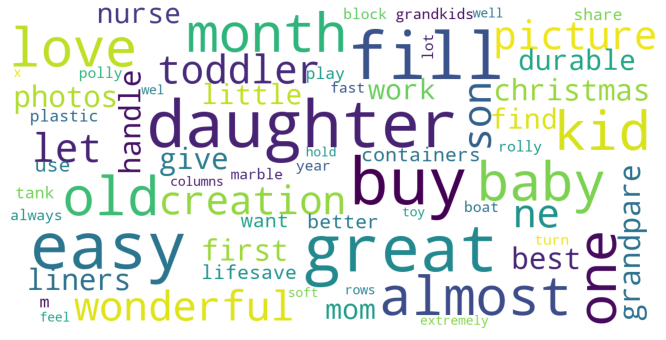

In [ ]:
stopwords = set(STOPWORDS)

def Mywordcloud(data, title = None):
    wordcloud = WordCloud(background_color= 'White', 
                        stopwords = stopwords, 
                        max_words = 200, 
                        max_font_size=40, 
                        scale=3, 
                        random_state=1).generate(str(data)) 

    fig = plt.figure(1, figsize = (12,6))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show() 
Mywordcloud([df5]) 

In [ ]:
df['Cat1'].value_counts()

5    10266
3     9772
1     5846
0     5637
4     4862
2     3617
Name: Cat1, dtype: int64

In [ ]:
a =  new_df[new_df['Cat1'] == 0][0:4500]
b =  new_df[new_df['Cat1'] == 1][0:4500]
c =  new_df[new_df['Cat1'] == 2][0:3617]
d =  new_df[new_df['Cat1'] == 3][0:4500]
e =  new_df[new_df['Cat1'] == 4][0:4500]
f =  new_df[new_df['Cat1'] == 5][0:4500]

In [ ]:
df_bal = pd.concat([a,b,c,d,e,f], axis =0)
df_bal

,Cat1,clean_text
62,0,buy toy baby begin newborn care less figure sp...
281,0,wonderful creation let baby toddler picture ne...
308,0,great son love since christmas first get month...
327,0,give daughter months old fill photos grandpare...
406,0,best liners baby easy handle easy fill durable...
...,...,...
9898,5,walkie talkies actually range feet good use ca...
9899,5,helicopters lot complicate basic airplane comp...
9903,5,product refine version beloved childhood game ...
9904,5,get sale amazon great deal kid love toy pack l...


In [ ]:
df_bal['clean_text'].shape

(26117,)

In [ ]:
df_bal['Cat1'].shape

(26117,)

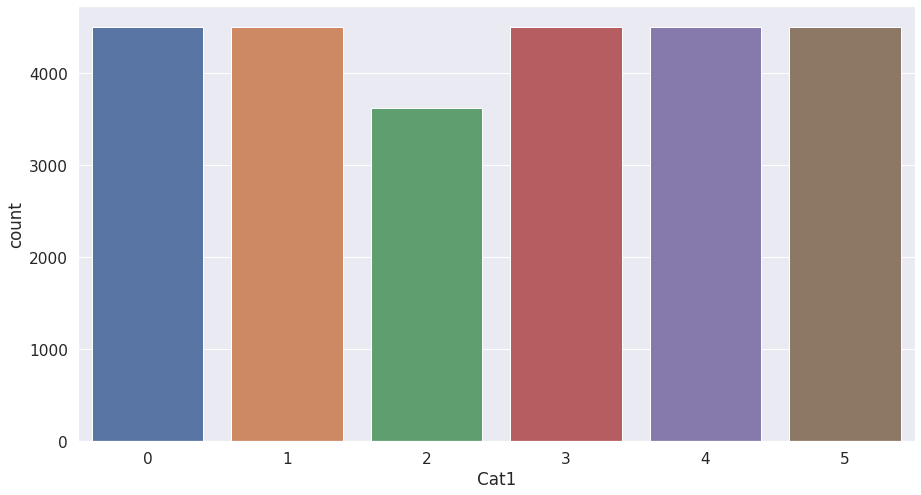

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(df_bal['Cat1'])

# TF-IDF on Logistic Regression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
Vec = vectorizer.fit_transform(df_bal['clean_text'])
print(vectorizer.get_feature_names())

['aaa', 'aaaa', 'aaaaaaaaaaaahhhhhhhhhh', 'aaaaaaaauuuuuuussssssoooooommmmmmmeeeeeee', 'aaas', 'aacute', 'aang', 'aare', 'aas', 'aayla', 'aback', 'abandon', 'abate', 'abbies', 'abby', 'abc', 'abcs', 'abd', 'abdomen', 'abdominal', 'abe', 'abel', 'abercrombie', 'aberration', 'aberrations', 'abhor', 'abialetti', 'abide', 'abigail', 'abilites', 'abilities', 'ability', 'abilties', 'abit', 'able', 'ablilty', 'ably', 'aboard', 'abolutely', 'abominable', 'abomination', 'aboout', 'aborbent', 'abort', 'abortion', 'abosorb', 'abosultely', 'abosultley', 'abou', 'aboud', 'abound', 'abouve', 'abracadabra', 'abrasion', 'abrasions', 'abrasive', 'abrasiveness', 'abrasives', 'abreviated', 'abritax', 'abroad', 'abrooks', 'abrupt', 'abruptly', 'abs', 'absaloutly', 'absence', 'absences', 'absent', 'absoltely', 'absolue', 'absolut', 'absolute', 'absolutely', 'absolutelypets', 'absolutey', 'absolutlely', 'absolutley', 'absolutly', 'absorb', 'absorbable', 'absorbablity', 'absorbancy', 'absorbant', 'absorbd', 

In [ ]:
# new_data_tfidf = pd.DataFrame(Vec.toarray(), columns = Vec.get_feature_names())

In [ ]:
Vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Vec.shape

(26117, 30603)

In [ ]:
X = Vec
y = df_bal["Cat1"].values

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=2020)

**`Logistic Regression` **

In [ ]:
model_logit_tf = LogisticRegression(class_weight="balanced",solver='saga', max_iter=100)
model_logit_tf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_tfidf = model_logit_tf.predict(X_test_tfidf)

f1score_TF_test = f1_score(y_test_tfidf, y_pred_tfidf, average='micro')
print(f"TF-IDF Model F1 Score for Logistic Regression: {f1score_TF_test * 100} %")

TF-IDF Model F1 Score for Logistic Regression: 84.62863705972435 %


In [ ]:
y_pred_tf_tr = model_logit_tf.predict(X_train_tfidf)

In [ ]:
f1score_TF_tr = f1_score(y_train_tfidf, y_pred_tf_tr, average='micro')
print(f"TF-IDF Model F1 Score for Logistic Regression: {f1score_TF_tr * 100} %")

TF-IDF Model F1 Score for Logistic Regression: 91.9446704637917 %


In [ ]:
# X_train score TF-IDF Model training Score and testing score for Logistic Regression.

In [ ]:
X_train_score_TF_IDf = model_logit_tf.score(X_train_tfidf, y_train_tfidf)
X_test_score_TF_IDf = model_logit_tf.score(X_test_tfidf, y_test_tfidf)

print(f"TF-IDF Model training Score for Logistic Regression: {X_train_score_TF_IDf * 100} %")
print(f"TF-IDF Model testing Score for Logistic Regression: {X_test_score_TF_IDf * 100} %")



TF-IDF Model training Score for Logistic Regression: 91.9446704637917 %
TF-IDF Model testing Score for Logistic Regression: 84.62863705972435 %


In [ ]:
#f1_train test

In [ ]:
recall_score_TF_test = recall_score(y_test_tfidf, model_logit_tf.predict(X_test_tfidf), average = 'macro')
print(f"TF-IDF Model Recall Score for Logistic Regression: {recall_score_TF_test * 100} %")

TF-IDF Model Recall Score for Logistic Regression: 84.82950904394544 %


In [ ]:
recall_score_TF_train = recall_score(y_train_tfidf, model_logit_tf.predict(X_train_tfidf), average = 'macro')
print(f"TF-IDF Model Recall Score for Logistic Regression: {recall_score_TF_train * 100} %")

TF-IDF Model Recall Score for Logistic Regression: 92.05046786129708 %


In [ ]:
#precision train test

In [ ]:
precision_score_TF_test = precision_score(y_test_tfidf, model_logit_tf.predict(X_test_tfidf), average = 'macro')
print(f"TF-IDF Model Precision Score for Logistic Regression: {precision_score_TF_test * 100} %")

TF-IDF Model Precision Score for Logistic Regression: 84.87143019750579 %


In [ ]:
precision_score_TF_train = precision_score(y_train_tfidf, model_logit_tf.predict(X_train_tfidf), average = 'macro')
print(f"TF-IDF Model Precision Score for Logistic Regression: {precision_score_TF_train * 100} %")

TF-IDF Model Precision Score for Logistic Regression: 91.98658118014347 %


In [ ]:
#Roc-Auc score

In [ ]:
y_pred_tfidf_train = model_logit_tf.predict(X_train_tfidf)
y_prob_pred_cnb_train = model_logit_tf.predict_proba(X_train_tfidf) 

In [ ]:
roc_auc_score(y_pred_tfidf_train, y_prob_pred_cnb_train, multi_class='ovo', average='weighted')

0.9991146492399144

In [ ]:
y_pred_tfidf = model_logit_tf.predict(X_test_tfidf)
y_prob_pred_cnb = model_logit_tf.predict_proba(X_test_tfidf)       

In [ ]:
roc_auc_score(y_test_tfidf, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.9755426325139254

In [ ]:
#Plotting Roc_auc curve

In [ ]:
import matplotlib.pyplot as plt


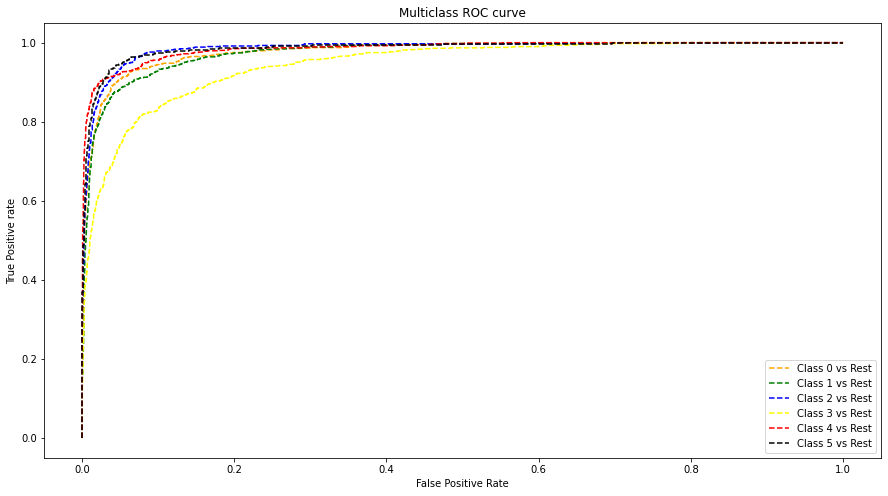

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_tfidf, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  


In [ ]:
acc_table_tfidf = classification_report(y_test_tfidf, y_pred_tfidf)

# print the table
print(acc_table_tfidf)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       886
           1       0.84      0.84      0.84       893
           2       0.81      0.89      0.85       716
           3       0.73      0.77      0.75       916
           4       0.95      0.84      0.89       928
           5       0.88      0.89      0.89       885

    accuracy                           0.85      5224
   macro avg       0.85      0.85      0.85      5224
weighted avg       0.85      0.85      0.85      5224



In [ ]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha=0.1)

In [ ]:
scores = cross_validate(lasso, X, y, cv=3,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])

[-3.95113967 -2.75042467 -2.54961516]


In [ ]:
print(scores['train_r2'])

[0. 0. 0.]


In [ ]:
>>> cv_results = cross_validate(lasso, X, y, cv=3)
>>> sorted(cv_results.keys())
['fit_time', 'score_time', 'test_score']
>>> cv_results['test_score']


array([-0.01862823, -0.00206207, -0.01491744])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm

array([[756,  18,  12,  43,  12,  45],
       [ 14, 748,  24,  91,   6,  10],
       [  4,  20, 640,  40,   2,  10],
       [ 30,  77,  77, 704,  10,  18],
       [ 17,  24,  19,  65, 782,  21],
       [ 40,   6,  14,  22,  12, 791]])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression by using TF-IDF')

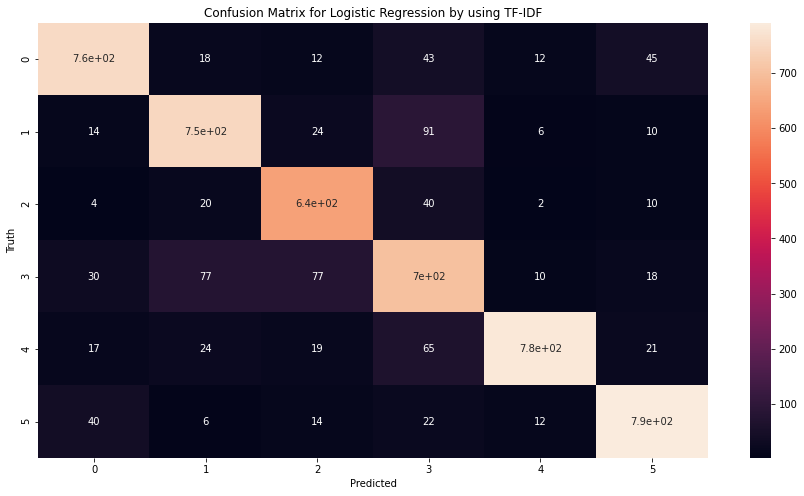

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression by using TF-IDF')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression by using TF-IDF')

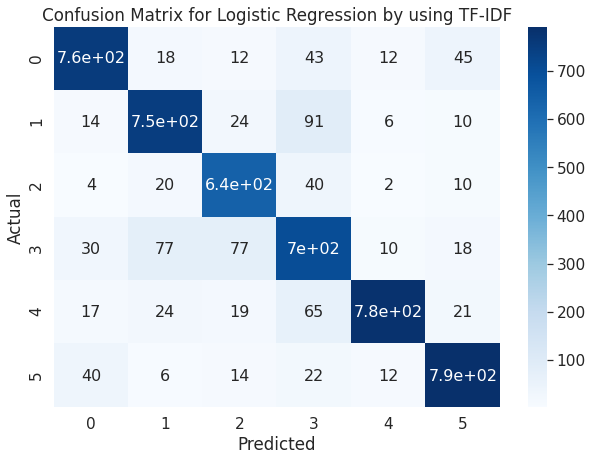

In [ ]:
data = confusion_matrix(y_test_tfidf, y_pred_tfidf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_tfidf), index = np.unique(y_test_tfidf))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Logistic Regression by using TF-IDF')

In [ ]:
#logreg = sm.Logit(y_train_tfidf, X_train_tfidf).fit()
#print(logreg.summary())

# inference: TF-IDF on Logistic Regression
  By using TF-IDF [technique for vectorization], we got **83.3% of F1 score**.
  so, TF-IDF works better,  it has clearly better linearity separable  classes    as shown in the increased F1 score. 

# CountVectorizer on Logistic Regression.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer_c = CountVectorizer()
Count_cv = vectorizer_c.fit_transform(df_bal['clean_text'])
print(vectorizer_c.get_feature_names())

['aaa', 'aaaa', 'aaaaaaaaaaaahhhhhhhhhh', 'aaaaaaaauuuuuuussssssoooooommmmmmmeeeeeee', 'aaas', 'aacute', 'aang', 'aare', 'aas', 'aayla', 'aback', 'abandon', 'abate', 'abbies', 'abby', 'abc', 'abcs', 'abd', 'abdomen', 'abdominal', 'abe', 'abel', 'abercrombie', 'aberration', 'aberrations', 'abhor', 'abialetti', 'abide', 'abigail', 'abilites', 'abilities', 'ability', 'abilties', 'abit', 'able', 'ablilty', 'ably', 'aboard', 'abolutely', 'abominable', 'abomination', 'aboout', 'aborbent', 'abort', 'abortion', 'abosorb', 'abosultely', 'abosultley', 'abou', 'aboud', 'abound', 'abouve', 'abracadabra', 'abrasion', 'abrasions', 'abrasive', 'abrasiveness', 'abrasives', 'abreviated', 'abritax', 'abroad', 'abrooks', 'abrupt', 'abruptly', 'abs', 'absaloutly', 'absence', 'absences', 'absent', 'absoltely', 'absolue', 'absolut', 'absolute', 'absolutely', 'absolutelypets', 'absolutey', 'absolutlely', 'absolutley', 'absolutly', 'absorb', 'absorbable', 'absorbablity', 'absorbancy', 'absorbant', 'absorbd', 

In [ ]:
# print(Count_vc.toarray())

In [ ]:
Count_cv.shape

(26117, 30603)

In [ ]:
X = Count_cv
y = df_bal["Cat1"].values

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.2, random_state=2020)

In [ ]:
model_logit_cv = LogisticRegression(class_weight="balanced",solver='saga', max_iter=100)
model_logit_cv.fit(X_train_cv, y_train_cv)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# F1 score

In [ ]:
y_pred_cv = model_logit_cv.predict(X_test_cv)

f1score = f1_score(y_test_cv, y_pred_cv, average='micro')
print(f"Count vectorizer Model Score for Logistic Regression: {f1score * 100} %")

Count vectorizer Model Score for Logistic Regression: 83.2312404287902 %


In [ ]:
f1score = f1_score(y_train_cv, y_pred_cv, average='micro')
print(f"Count vectorizer Model Score for Logistic Regression: {f1score * 100} %")

ValueError: ignored

In [ ]:
# Count Vectorization Model training Score and testing score for Logistic Regression.

In [ ]:
X_train_score_cv = model_logit_cv.score(X_train_cv, y_train_cv)
X_test_score_cv = model_logit_cv.score(X_test_cv, y_test_cv)

print(f"Count Vectorization Model training Score for Logistic Regression: {X_train_score_cv * 100} %")
print(f"Count Vectorization Model testing Score for Logistic Regression: {X_test_score_cv * 100} %")

Count Vectorization Model training Score for Logistic Regression: 91.34638395634902 %
Count Vectorization Model testing Score for Logistic Regression: 83.2312404287902 %


In [ ]:
recall_score_cv = recall_score(y_test_cv, model_logit_cv.predict(X_test_cv), average = 'macro')
print(f"Count vectorizer Model Recall Score for Logistic Regression: {recall_score_cv * 100} %")

Count vectorizer Model Recall Score for Logistic Regression: 83.41448422639996 %


In [ ]:
precision_score_cv = precision_score(y_test_cv, model_logit_cv.predict(X_test_cv), average = 'macro')
print(f"Count vectorizer Model Recall Score for Logistic Regression: {precision_score_cv * 100} %")

Count vectorizer Model Recall Score for Logistic Regression: 83.37774671161502 %


In [ ]:
acc_table_cv = classification_report(y_test_cv, y_pred_cv)

# print the table
print(acc_table_cv)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       886
           1       0.80      0.84      0.82       893
           2       0.82      0.87      0.85       716
           3       0.73      0.73      0.73       916
           4       0.93      0.84      0.88       928
           5       0.87      0.87      0.87       885

    accuracy                           0.83      5224
   macro avg       0.83      0.83      0.83      5224
weighted avg       0.83      0.83      0.83      5224



In [ ]:
## auc roc

In [ ]:
y_pred_cv = model_logit_cv.predict(X_test_cv)
y_prob_pred_cv = model_logit_cv.predict_proba(X_test_cv)     

In [ ]:
roc_auc_score(y_test_cv, y_prob_pred_cv, multi_class='ovo', average='weighted')

0.9707357878063002

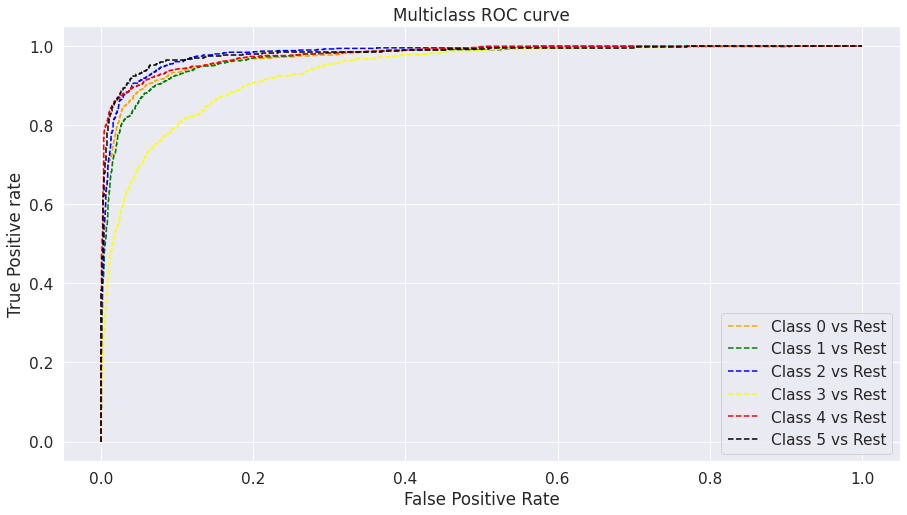

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_cv, y_prob_pred_cv[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [ ]:
cm_LR_cv = confusion_matrix(y_test_cv, y_pred_cv)
cm_LR_cv

array([[748,  24,  10,  44,  16,  44],
       [ 18, 751,  23,  85,   5,  11],
       [  7,  23, 626,  39,   8,  13],
       [ 36,  98,  71, 669,  18,  24],
       [ 21,  30,  19,  57, 782,  19],
       [ 52,  11,  16,  23,  11, 772]])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression by using Count Vectorizer')

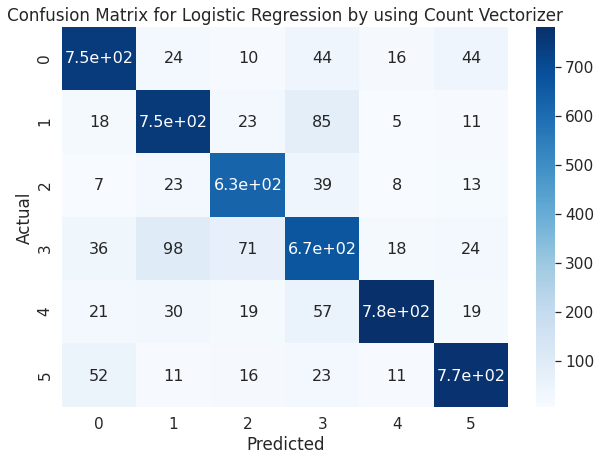

In [ ]:
data = confusion_matrix(y_test_cv, y_pred_cv)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_cv), index = np.unique(y_test_cv))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Logistic Regression by using Count Vectorizer')

# # inference: Count Vectorizer on Logistic Regression
  By using Count Vectorizer [technique for vectorization], we got **81.925% of F1 score**.
  so, Count Vectorizer also works better,  it has clearly better linearity separable  classes   as shown in the increased F1 score. 

# Naive_Bayes

In [ ]:
X = Count_cv
y = df_bal["Cat1"].values

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=2020)

from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB()
model_naive.fit(X_train_nb, y_train_nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nr_correct_nb = (y_test_nb == model_naive.predict(X_test_nb)).sum()

In [ ]:
print(f'{nr_correct_nb} documents classified correctly')

4400 documents classified correctly


In [ ]:
nr_incorrect_nb = y_test_nb.size - nr_correct_nb

In [ ]:
print(f'Number of documents incorrectly classified is {nr_incorrect_nb}')

Number of documents incorrectly classified is 824


In [ ]:
fraction_wrong_nb = nr_incorrect_nb / (nr_correct_nb + nr_incorrect_nb)

In [ ]:
print(f'The (testing) accuracy of the model is  {1-fraction_wrong_nb:.2%}')

The (testing) accuracy of the model is  84.23%


In [ ]:
#  training Score and testing score for Naive Bayes Model

In [ ]:
X_train_score_nb = model_naive.score(X_train_nb, y_train_nb)
X_test_score_nb = model_naive.score(X_test_nb, y_test_nb)

print(f"Naive Bayes Model training Score : {X_train_score_nb * 100} %")
print(f"Naive Bayes Model testing Score : {X_test_score_nb * 100} %")



Naive Bayes Model training Score : 88.6564878188867 %
Naive Bayes Model testing Score : 84.22664624808576 %


#### Recall Score for Naive Bayes

In [ ]:
recall_score_naive_test = recall_score(y_test_nb, model_naive.predict(X_test_nb), average = 'macro')
print(f"Count vectorizer Model Recall Score for Naive Bayes: {recall_score_naive_test * 100} %")

Count vectorizer Model Recall Score for Naive Bayes: 84.4134426652421 %


In [ ]:
recall_score_naive_train = recall_score(y_train_nb, model_naive.predict(X_train_nb), average = 'macro')
print(f"Count vectorizer Model Recall Score for Naive Bayes: {recall_score_naive_train * 100} %")

Count vectorizer Model Recall Score for Naive Bayes: 88.73012396469878 %


#### Precision Score for Naive Bayes

In [ ]:
precision_score_naive_test = precision_score(y_test_nb, model_naive.predict(X_test_nb), average = 'macro')
print(f"Count vectorizer Model precision_score for Naive Bayes: {precision_score_naive_test * 100} %")

Count vectorizer Model precision_score for Naive Bayes: 84.22078169786201 %


In [ ]:
precision_score_naive_train = precision_score(y_train_nb, model_naive.predict(X_train_nb), average = 'macro')
print(f"Count vectorizer Model precision_score for Naive Bayes: {precision_score_naive_train * 100} %")

Count vectorizer Model precision_score for Naive Bayes: 88.7000668371274 %


#### F1 Score for Naive Bayes

In [ ]:
f1_score_naive_test = f1_score(y_test_nb, model_naive.predict(X_test_nb), average = 'macro')
print(f"Count vectorizer Model f1_score for Naive Bayes: {f1_score_naive_test * 100} %")

Count vectorizer Model f1_score for Naive Bayes: 84.1530094719551 %


In [ ]:
f1_score_naive_train = f1_score(y_train_nb, model_naive.predict(X_train_nb), average = 'macro')
print(f"Count vectorizer Model f1_score for Naive Bayes: {f1_score_naive_train * 100} %")

Count vectorizer Model f1_score for Naive Bayes: 88.61356872185858 %


In [ ]:
model_naive.score(X_test_nb, y_test_nb)

0.8422664624808576

In [ ]:
# Count_vc = vectorizer_c.transform(X_test)

In [ ]:
X_test_nb[:10]

<10x30603 sparse matrix of type '<class 'numpy.int64'>'
	with 294 stored elements in Compressed Sparse Row format>

In [ ]:
y_test_nb[:10]

array([4, 3, 1, 5, 1, 4, 3, 4, 5, 5])

In [ ]:
model_naive.predict(X_test_nb[:10])

array([4, 3, 1, 5, 0, 4, 0, 4, 5, 5])

In [ ]:
model_naive.predict_proba(X_test_nb[:10])

array([[1.58364260e-10, 6.01006269e-22, 5.83892266e-26, 7.78212063e-11,
        1.00000000e+00, 4.93827285e-17],
       [3.59005723e-14, 6.50383735e-20, 4.33480229e-28, 1.00000000e+00,
        1.84624179e-14, 2.52211440e-13],
       [1.27490403e-09, 9.99998998e-01, 2.56041115e-10, 6.77056025e-07,
        3.23424762e-07, 8.64422828e-12],
       [5.39587103e-06, 6.95160973e-04, 3.29559492e-06, 4.33471587e-07,
        1.83767114e-05, 9.99277337e-01],
       [5.23297335e-01, 1.49309106e-01, 3.17742618e-04, 2.32031715e-01,
        2.79171587e-02, 6.71269434e-02],
       [2.03283105e-14, 1.84681154e-18, 5.94298870e-21, 1.16620878e-15,
        1.00000000e+00, 3.10158805e-20],
       [9.68164514e-01, 5.79438539e-08, 1.37476991e-10, 1.61722251e-03,
        8.88522637e-07, 3.02173164e-02],
       [2.10385534e-13, 9.18697554e-27, 9.71373630e-22, 2.90709092e-14,
        1.00000000e+00, 2.68943756e-18],
       [2.80085868e-02, 1.98516518e-06, 2.81867083e-05, 4.61908665e-05,
        3.78667427e-03, 

In [ ]:
y_pred_nb = model_naive.predict(X_test_nb)
y_pred_nb

array([4, 3, 1, ..., 2, 0, 2])

#### Roc-Auc Score

In [ ]:
y_pred_nb_train = model_naive.predict(X_train_nb)
y_prob_pred_nb_train = model_naive.predict_proba(X_train_nb)

In [ ]:
roc_auc_score(y_train_nb, y_prob_pred_nb_train, multi_class='ovo', average='weighted')

0.9831050289524812

In [ ]:
y_pred_nb_test = model_naive.predict(X_test_nb)
y_prob_pred_nb_test = model_naive.predict_proba(X_test_nb)

In [ ]:
roc_auc_score(y_test_nb, y_prob_pred_nb_test, multi_class='ovo', average='weighted')

0.9721007674131867

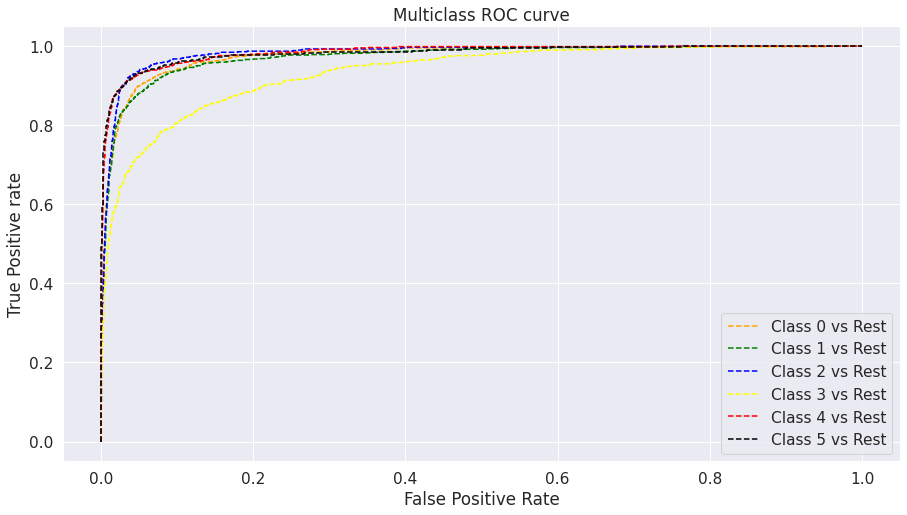

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_nb, y_prob_pred_nb_test[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
cm_LR_nb = confusion_matrix(y_test_nb, y_pred_nb)
cm_LR_nb

array([[787,  14,   6,  13,  16,  50],
       [ 30, 763,  14,  65,  11,  10],
       [  9,  19, 630,  25,  17,  16],
       [ 71,  94,  81, 615,  30,  25],
       [ 30,  22,  11,  32, 816,  17],
       [ 62,   6,   4,   9,  15, 789]])

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

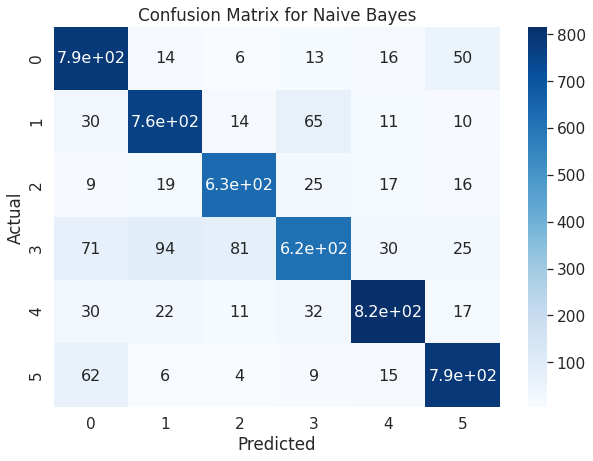

In [ ]:
data = confusion_matrix(y_test_nb, y_pred_nb)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_nb), index = np.unique(y_test_nb))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Naive Bayes')

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_tree = DecisionTreeClassifier()

In [ ]:
X = Count_cv
y = df_bal["Cat1"].values

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=2020)

In [ ]:
model_tree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#  training Score and testing score for Decision Tree Model

In [ ]:
X_train_score_dt = model_tree.score(X_train_dt, y_train_dt)
X_test_score_dt = model_tree.score(X_test_dt, y_test_dt)

print(f"Decision Tree Model training Score : {X_train_score_dt * 100} %")
print(f"Decision Tree Model testing Score : {X_test_score_dt * 100} %")


Decision Tree Model training Score : 99.91384674292826 %
Decision Tree Model testing Score : 69.58269525267994 %


#### F1 score for DT

In [ ]:
f1_score_DT_test = f1_score(y_test_dt, model_tree.predict(X_test_dt), average = 'macro')
print(f"Count vectorizer Model f1_score for Decision Tree: {f1_score_DT_test * 100} %")

Count vectorizer Model f1_score for Decision Tree: 69.67590998282495 %


In [ ]:
f1_score_DT_train = f1_score(y_train_dt, model_tree.predict(X_train_dt), average = 'macro')
print(f"Count vectorizer Model f1_score for Decision Tree: {f1_score_DT_train * 100} %")

Count vectorizer Model f1_score for Decision Tree: 99.91374862828592 %


#### Recall score for DT

In [ ]:
recall_score_DT_test = recall_score(y_test_dt, model_tree.predict(X_test_dt), average = 'macro')
print(f"Count vectorizer Model recall_score for Decision Tree: {recall_score_DT_test * 100} %")

Count vectorizer Model recall_score for Decision Tree: 69.69082509420387 %


In [ ]:
recall_score_DT_train = recall_score(y_train_dt, model_tree.predict(X_train_dt), average = 'macro')
print(f"Count vectorizer Model recall_score for Decision Tree: {recall_score_DT_train * 100} %")

Count vectorizer Model recall_score for Decision Tree: 99.91448070313957 %


#### Precision Score for DT

In [ ]:
precision_score_DT_test = precision_score(y_test_dt, model_tree.predict(X_test_dt), average = 'macro')
print(f"Count vectorizer Model precision_score for Decision Tree: {precision_score_DT_test * 100} %")

Count vectorizer Model precision_score for Decision Tree: 69.79096898725449 %


In [ ]:
precision_score_DT_train = precision_score(y_train_dt, model_tree.predict(X_train_dt), average = 'macro')
print(f"Count vectorizer Model precision_score for Decision Tree: {precision_score_DT_train * 100} %")

Count vectorizer Model precision_score for Decision Tree: 99.91305820351891 %


#### Roc-Auc Score

In [ ]:
y_pred_dt_train = model_tree.predict(X_train_dt)
y_prob_pred_dt_train = model_tree.predict_proba(X_train_dt)

In [ ]:
roc_auc_score(y_train_dt, y_prob_pred_dt_train, multi_class='ovo', average='weighted')

0.9999994742167356

In [ ]:
y_pred_dt_test = model_tree.predict(X_test_dt)
y_prob_pred_dt_test = model_tree.predict_proba(X_test_dt)

In [ ]:
roc_auc_score(y_test_dt, y_prob_pred_dt_test, multi_class='ovo', average='weighted')

0.818586199525506

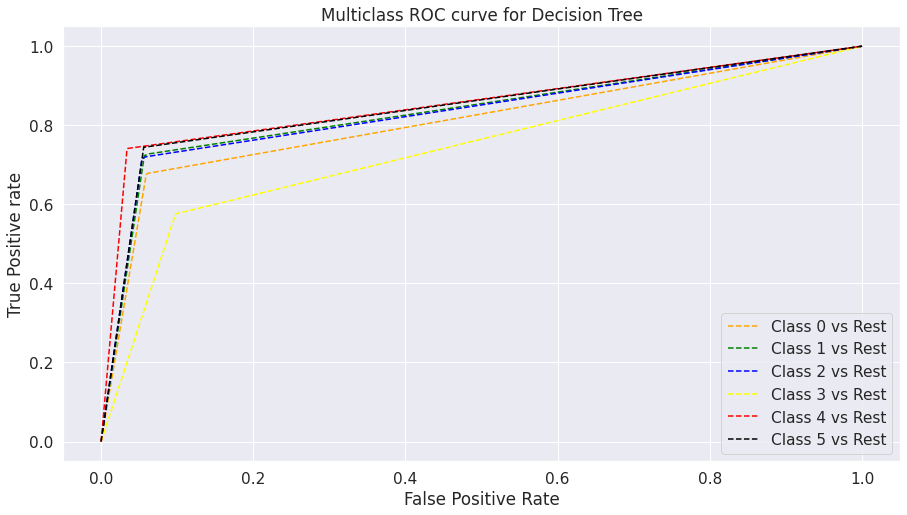

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_dt, y_prob_pred_dt_test[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
cm_LR_dt = confusion_matrix(y_test_dt, y_pred_dt_test)
cm_LR_dt

array([[598,  28,  30,  93,  40,  97],
       [ 36, 646,  48, 118,  25,  20],
       [ 24,  35, 516,  97,  18,  26],
       [ 69, 111, 112, 528,  39,  57],
       [ 32,  44,  41,  80, 688,  43],
       [ 97,  28,  36,  37,  28, 659]])

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

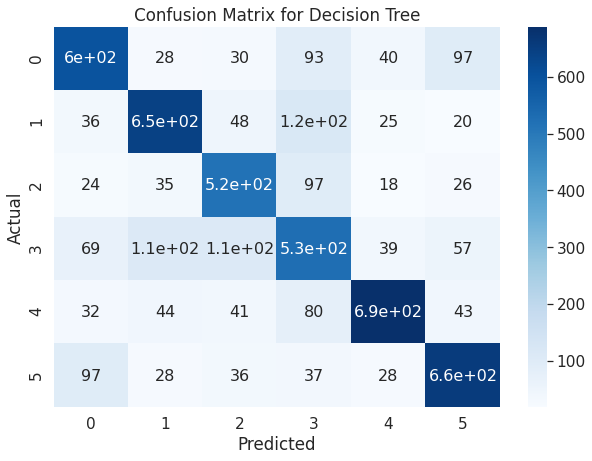

In [ ]:
data = confusion_matrix(y_test_dt, y_pred_dt_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_dt), index = np.unique(y_test_dt))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Decision Tree')

# Hyper parameter tunning for Decision Tree

In [ ]:
X = Count_cv
y = df_bal["Cat1"].values

In [ ]:
X.shape

(26117, 30603)

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [130, 150],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 130, 'criterion': 'gini'}
Best score is 0.6896268096788296


# Random Forest Classifier- Count Vectorizer


In [ ]:
X = Count_cv
y = df_bal["Cat1"].values

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=2020)

In [ ]:
X_test_rf.shape

(5224, 30603)

In [ ]:
X_train_rf.shape

(20893, 30603)

In [ ]:
y_train_rf.shape

(20893,)

In [ ]:
y_test_rf.shape

(5224,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf, y_train_rf)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#  training Score and testing score for Random Forest Model

In [ ]:
X_train_score_rf = model_rf.score(X_train_rf, y_train_rf)
X_test_score_rf = model_rf.score(X_test_rf, y_test_rf)

print(f"Random Forest Model training Score : {X_train_score_rf * 100} %")
print(f"Random Forest Model testing Score : {X_test_score_rf * 100} %")

#  training Score and testing score for Naive Bayes Model

Random Forest Model training Score : 99.91384674292826 %
Random Forest Model testing Score : 80.20673813169985 %


In [ ]:
y_pred_rf = model_rf.predict(X_test_rf)
y_pred_rf

array([4, 3, 1, ..., 2, 0, 2])

#### f1 score Random Forest

In [ ]:
f1_score_RandomF_test = f1_score(y_test_rf, model_rf.predict(X_test_rf), average = 'macro')
print(f"Count vectorizer Model f1_score for Random Forest: {f1_score_RandomF_test * 100} %")

Count vectorizer Model f1_score for Random Forest: 80.10243878023996 %


In [ ]:
f1_score_RandomF_train = f1_score(y_train_rf, model_rf.predict(X_train_rf), average = 'macro')
print(f"Count vectorizer Model f1_score for Random Forest: {f1_score_RandomF_train * 100} %")

Count vectorizer Model f1_score for Random Forest: 99.9137449529925 %


#### recall score Random Forest

In [ ]:
recall_score_RandomF_test = recall_score(y_test_rf, model_rf.predict(X_test_rf), average = 'macro')
print(f"Count vectorizer Model recall_score for Random Forest: {recall_score_RandomF_test * 100} %")

Count vectorizer Model recall_score for Random Forest: 80.53428483934366 %


In [ ]:
recall_score_RandomF_train = recall_score(y_train_rf, model_rf.predict(X_train_rf), average = 'macro')
print(f"Count vectorizer Model recall_score for Random Forest: {recall_score_RandomF_train * 100} %")

Count vectorizer Model recall_score for Random Forest: 99.91334597733558 %


#### precision score Random Forest

In [ ]:
precision_score_RandomF_test = precision_score(y_test_rf, model_rf.predict(X_test_rf), average = 'macro')
print(f"Count vectorizer Model precision_score for Random Forest: {precision_score_RandomF_test * 100} %")

Count vectorizer Model precision_score for Random Forest: 80.18743315697114 %


In [ ]:
precision_score_RandomF_train = precision_score(y_train_rf, model_rf.predict(X_train_rf), average = 'macro')
print(f"Count vectorizer Model precision_score for Random Forest: {precision_score_RandomF_train * 100} %")

Count vectorizer Model precision_score for Random Forest: 99.91418302799588 %


In [ ]:
y_test_rf[:10]

array([4, 3, 1, 5, 1, 4, 3, 4, 5, 5])

In [ ]:
y_predict_rf = model_rf.predict(X_test_rf[:10])
y_predict_rf

array([4, 3, 1, 5, 3, 4, 3, 4, 5, 5])

#### Roc-Auc Score DT

In [ ]:
y_pred_rf_train = model_rf.predict(X_train_rf)
y_prob_pred_rf_train = model_rf.predict_proba(X_train_rf)

In [ ]:
roc_auc_score(y_pred_rf_train, y_prob_pred_rf_train, multi_class='ovo', average='weighted')

1.0

In [ ]:
y_pred_rf = model_rf.predict(X_test_rf)
y_prob_pred_rf = model_rf.predict_proba(X_test_rf)

In [ ]:
roc_auc_score(y_test_rf, y_prob_pred_rf, multi_class='ovo', average='weighted')

0.9564273556106493

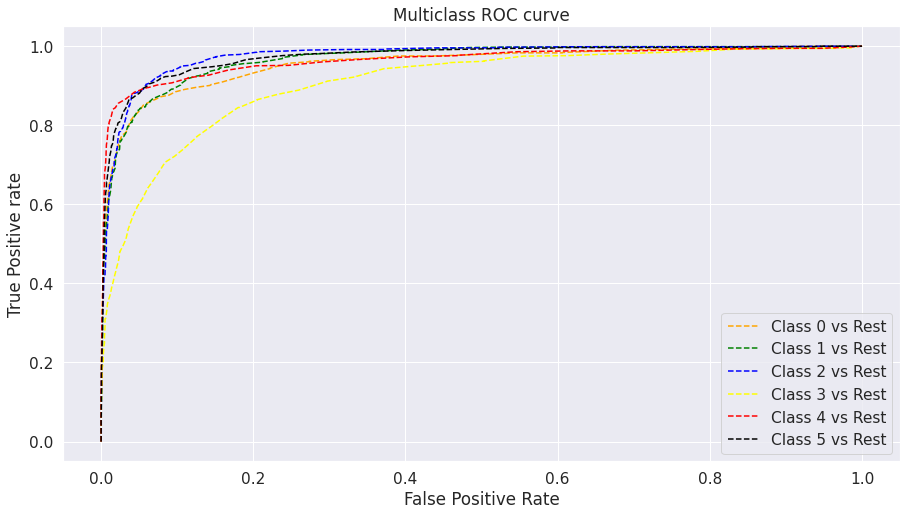

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_rf, y_prob_pred_rf[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
cm_LR_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_LR_rf

array([[721,  20,  14,  41,  15,  75],
       [ 18, 765,  20,  76,   3,  11],
       [ 10,  25, 625,  29,   8,  19],
       [ 58, 138, 119, 548,  21,  32],
       [ 28,  41,  21,  55, 754,  29],
       [ 49,  13,  13,  18,  15, 777]])

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

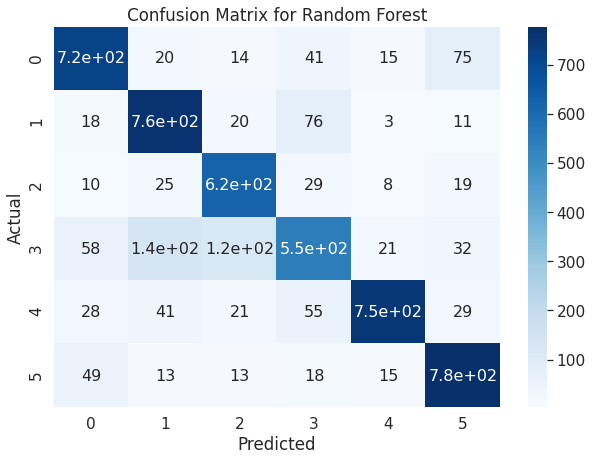

In [ ]:
data = confusion_matrix(y_test_rf, y_pred_rf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_rf), index = np.unique(y_test_rf))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Random Forest')

# Hyper parameter tunning for random forest

In [ ]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [130, 150],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
rf = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5)

# Fit it to the data
rf_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 130, 'criterion': 'gini'}
Best score is 0.7977554074494981


# KNN

In [ ]:
X = Count_cv
y = df_bal["Cat1"].values

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')

In [ ]:
knn_classifier.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
#  training Score and testing score for Support vector Machine classifier Model

In [ ]:
X_train_score_knn = knn_classifier.score(X_train_knn, y_train_knn)
X_test_score_knn = knn_classifier.score(X_test_knn, y_test_knn)

print(f"KNeighbors Classifier Model training Score : {X_train_score_knn * 100} %")
print(f"KNeighbors Classifier Model testing Score : {X_test_score_knn * 100} %")


KNeighbors Classifier Model training Score : 63.72469248073518 %
KNeighbors Classifier Model testing Score : 49.3874425727412 %


In [ ]:
pred_test_knn = knn_classifier.predict(X_test_knn)
pred_test_knn

array([2, 1, 4, ..., 2, 1, 0])

In [ ]:
class_report_knn = (classification_report(y_test_knn, pred_test_knn))
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       890
           1       0.38      0.67      0.49       895
           2       0.32      0.56      0.41       686
           3       0.53      0.31      0.39       881
           4       0.76      0.43      0.55       920
           5       0.82      0.49      0.62       952

    accuracy                           0.49      5224
   macro avg       0.56      0.50      0.50      5224
weighted avg       0.57      0.49      0.50      5224



#### F1 score for KNN 

In [ ]:
f1_score_knn_test = f1_score(y_test_knn, knn_classifier.predict(X_test_knn), average = 'macro')
print(f"Count vectorizer Model f1_score for KNN classifier: {f1_score_knn_test * 100} %")

Count vectorizer Model f1_score for KNN classifier: 49.6221897343393 %


In [ ]:
f1_score_knn_train = f1_score(y_train_knn, knn_classifier.predict(X_train_knn), average = 'macro')
print(f"Count vectorizer Model f1_score for KNN classifier: {f1_score_knn_train * 100} %")

Count vectorizer Model f1_score for KNN classifier: 63.68875153754847 %


#### Recall Score for KNN

In [ ]:
recall_score_knn_test = recall_score(y_test_knn, knn_classifier.predict(X_test_knn), average = 'macro')
print(f"Count vectorizer Model recall_score for support vector classifier: {recall_score_knn_test * 100} %")

Count vectorizer Model recall_score for support vector classifier: 49.6270181284218 %


In [ ]:
recall_score_knn_train = recall_score(y_train_knn, knn_classifier.predict(X_train_knn), average = 'macro')
print(f"Count vectorizer Model recall_score for support vector classifier: {recall_score_knn_train * 100} %")

Count vectorizer Model recall_score for support vector classifier: 64.12866123479346 %


#### Precision Score for KNN

In [ ]:
precision_score_knn_test = precision_score(y_test_knn, knn_classifier.predict(X_test_knn), average = 'macro')
print(f"Count vectorizer Model precision_score for support vector classifier: {precision_score_knn_test * 100} %")

Count vectorizer Model precision_score for support vector classifier: 55.876024198861394 %


In [ ]:
precision_score_knn_train = precision_score(y_train_knn, knn_classifier.predict(X_train_knn), average = 'macro')
print(f"Count vectorizer Model precision_score for support vector classifier: {precision_score_knn_train * 100} %")

Count vectorizer Model precision_score for support vector classifier: 68.81971801778795 %


#### Roc-Auc Score KNN

In [ ]:
y_pred_knn_train = knn_classifier.predict(X_train_knn)
y_prob_pred_cnb_knn_train = knn_classifier.predict_proba(X_train_knn)    

In [ ]:
roc_auc_score(y_train_knn, y_prob_pred_cnb_knn_train, multi_class='ovo', average='weighted')

0.9289240302954294

In [ ]:
y_pred_knn = knn_classifier.predict(X_test_knn)
y_prob_pred_cnb_knn = knn_classifier.predict_proba(X_test_knn)    

In [ ]:
roc_auc_score(y_test_knn, y_prob_pred_cnb_knn, multi_class='ovo', average='weighted')

0.7904582440108675

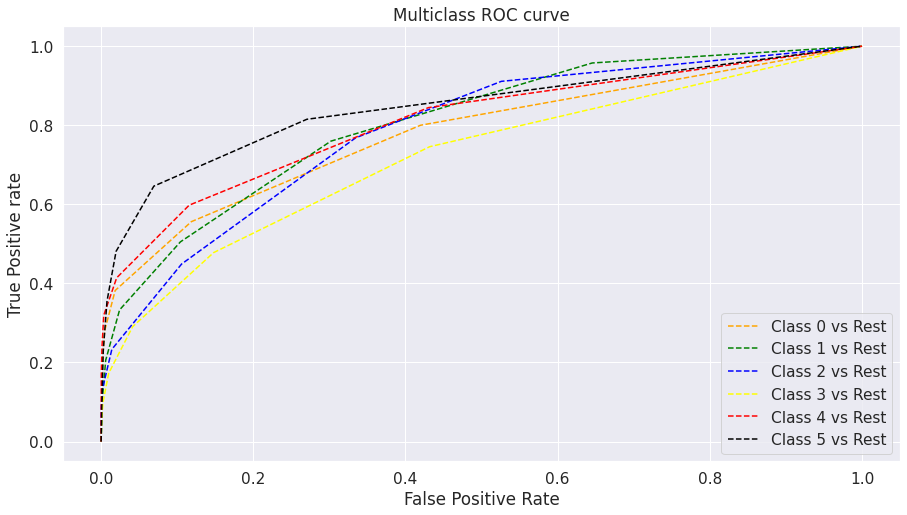

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_knn, y_prob_pred_cnb_knn[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [ ]:
cm_LR_knn = confusion_matrix(y_test_knn, y_pred_knn)
cm_LR_knn

array([[462, 153, 141,  48,  34,  52],
       [ 74, 597, 141,  60,  15,   8],
       [ 64, 175, 384,  41,  12,  10],
       [ 93, 286, 195, 269,  26,  12],
       [ 63, 203, 178,  58, 400,  18],
       [105, 147, 161,  31,  40, 468]])

Text(0.5, 1.0, 'Confusion Matrix for Support vector classification')

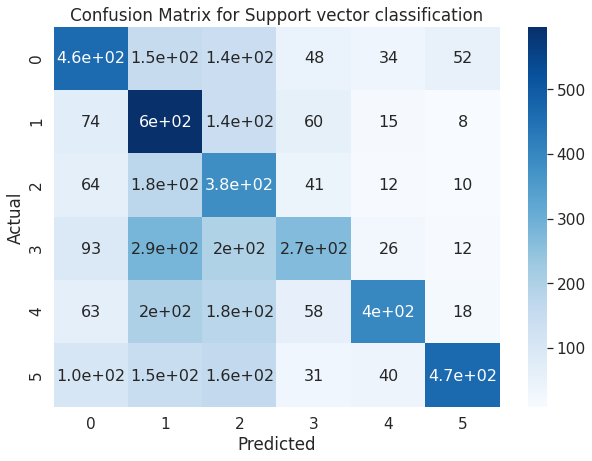

In [ ]:
data = confusion_matrix(y_test_knn, y_pred_knn)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_knn), index = np.unique(y_test_knn))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Support vector classification')

# Bagging 

In [ ]:
X = Vec
y = df_bal["Cat1"].values

X_train_bagg, X_test_bagg, y_train_bagg, y_test_bagg = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train_bagg.shape

(20893, 30603)

In [ ]:
X_test_bagg.shape

(5224, 30603)

In [ ]:
y_train_bagg.shape

(20893,)

In [ ]:
y_test_bagg.shape

(5224,)

In [ ]:
X.shape

(26117, 30603)

In [ ]:
y.shape

(26117,)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag = BaggingClassifier(n_estimators = 500, max_samples = 0.6, max_features = 0.3)
bag.fit(X_train_bagg, y_train_bagg)
y_pred_bagg = bag.predict(X_test_bagg)
print('Bagging with DT accuracy is :', accuracy_score(y_test_bagg, y_pred_bagg))


Bagging with DT accuracy is : 0.8129785604900459


In [ ]:
X_train_score_bagg = bag.score(X_train_bagg, y_train_bagg)
X_test_score_bagg = bag.score(X_test_bagg, y_test_bagg)

print(f"DT Classifier Model training Score : {X_train_score_bagg * 100} %")
print(f"DT Classifier Model testing Score : {X_test_score_bagg * 100} %")


DT Classifier Model training Score : 99.88034269851146 %
DT Classifier Model testing Score : 81.2978560490046 %


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=6, n_informative=4, random_state=5)
# define the model
model = BaggingClassifier(n_estimators = 500, max_samples = 0.5, max_features = 0.5)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y,  cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.885 (0.031)


In [ ]:
model.fit(X_train_bagg, y_train_bagg)
y_pred_bagg_hy = model.predict(X_test_bagg)
print('Bagging with DT accuracy is :', accuracy_score(y_test_bagg, y_pred_bagg_hy))

Bagging with DT accuracy is : 0.7371745788667687


In [ ]:
# F1_score

In [ ]:
f1_score_bagg_test = f1_score(y_test_bagg, bag.predict(X_test_bagg), average = 'macro')
print(f"Count vectorizer Model f1_score test for Bagging: {f1_score_bagg_test * 100} %")

Count vectorizer Model f1_score test for Bagging: 81.14590622924496 %


In [ ]:
f1_score_bagg_train = f1_score(y_train_bagg, bag.predict(X_train_bagg), average = 'macro')
print(f"Count vectorizer Model f1_score train for KNN classifier: {f1_score_bagg_train * 100} %")

Count vectorizer Model f1_score train for KNN classifier: 99.88072723099435 %


In [ ]:
# Recall Score

In [ ]:
recall_bagg_test = recall_score(y_test_bagg, bag.predict(X_test_bagg), average = 'macro')
print(f"Count vectorizer Model recall test for Bagging: {recall_bagg_test * 100} %")

Count vectorizer Model recall test for Bagging: 81.30412126634589 %


In [ ]:
recall_bagg_train = recall_score(y_train_bagg, bag.predict(X_train_bagg), average = 'macro')
print(f"Count vectorizer Model recall_score train for KNN classifier: {recall_bagg_train * 100} %")

Count vectorizer Model recall_score train for KNN classifier: 99.88018054399923 %


In [ ]:
# Precision Score

In [ ]:
precision_bagg_test = precision_score(y_test_bagg, bag.predict(X_test_bagg), average = 'macro')
print(f"Count vectorizer Model precision_score test for Bagging: {precision_bagg_test * 100} %")

Count vectorizer Model precision_score test for Bagging: 81.19361168588455 %


In [ ]:
precision_bagg_train = precision_score(y_train_bagg, bag.predict(X_train_bagg), average = 'macro')
print(f"Count vectorizer Model precision_score train for KNN classifier: {precision_bagg_train * 100} %")

Count vectorizer Model precision_score train for KNN classifier: 99.88137154614924 %


In [ ]:
# Roc Auc score 

In [ ]:
# for train
y_pred_bagg_train = bag.predict(X_train_bagg)
y_prob_pred_bagg_train = bag.predict_proba(X_train_bagg) 

In [ ]:
roc_auc_score(y_train_bagg, y_prob_pred_bagg_train, multi_class='ovo', average='weighted')

0.9999584961861305

In [ ]:
# for test
y_pred_bagg_test = bag.predict(X_test_bagg)
y_prob_pred_bagg_test = bag.predict_proba(X_test_bagg)

In [ ]:
roc_auc_score(y_test_bagg, y_prob_pred_bagg_test, multi_class='ovo', average='weighted')

0.9641631099747402

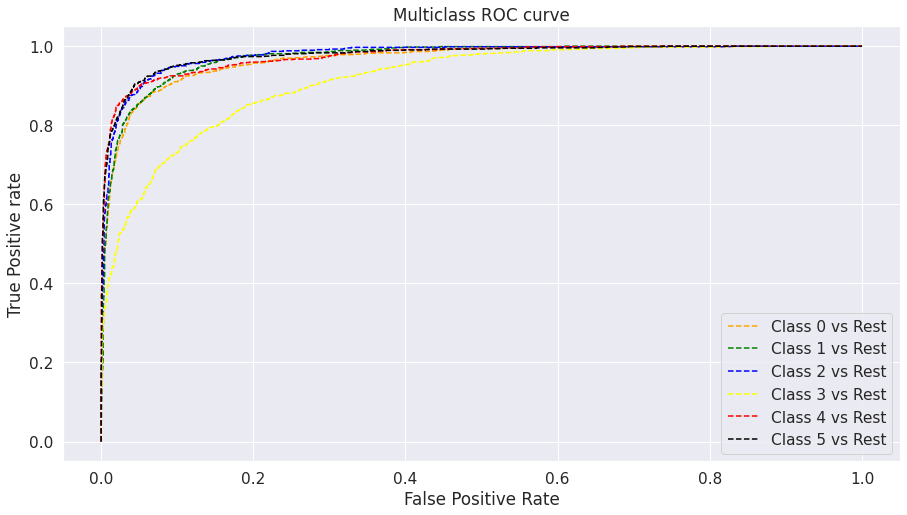

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_bagg, y_prob_pred_bagg_test[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
cm_bagging = confusion_matrix(y_test_bagg, y_pred_bagg_test)
cm_bagging

array([[735,  24,   6,  32,  20,  73],
       [  8, 767,  12,  93,   7,   8],
       [ 15,  26, 582,  32,   9,  22],
       [ 59, 118,  85, 561,  28,  30],
       [ 33,  26,  24,  60, 752,  25],
       [ 52,  10,   3,  22,  15, 850]])

Text(0.5, 1.0, 'Confusion Matrix for Bagging classifier')

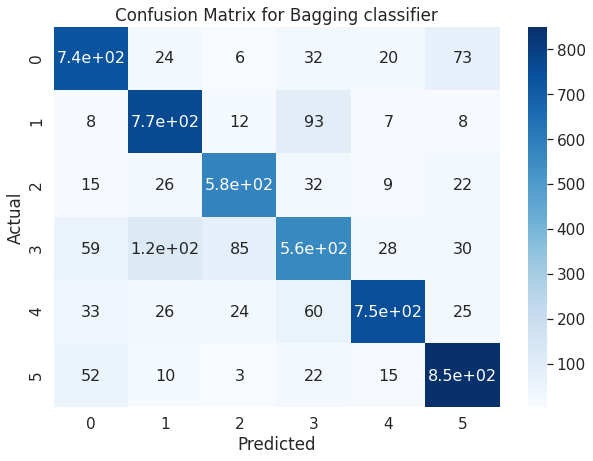

In [ ]:
data = confusion_matrix(y_test_bagg, y_pred_bagg_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_bagg), index = np.unique(y_test_bagg))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for Bagging classifier')

# XG Boost

In [ ]:
!pip install xgboost

In [ ]:
# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
X = Count_cv
y = df_bal["Cat1"].values

# shape of the dataset
print('Shape of training data :',X.shape)
print('Shape of testing data :',y.shape)

X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X, y, test_size=0.2, random_state=10)


model_boost = XGBClassifier()

# fit the model with the training data
model_boost.fit(X_train_boost,y_train_boost)


# predict the target on the train dataset
predict_train = model_boost.predict(X_train_boost)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train_boost,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model_boost.predict(X_test_boost)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test_boost,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

Shape of training data : (26117, 30603)
Shape of testing data : (26117,)

Target on train data [3 2 3 ... 0 1 4]

accuracy_score on train dataset :  0.7658545924472311

Target on test data [3 5 4 ... 2 0 5]

accuracy_score on test dataset :  0.7566998468606432


In [ ]:
# F1_Score

In [ ]:
f1_score_boost_test = f1_score(y_test_boost, model_boost.predict(X_test_boost), average = 'macro')
print(f"Count vectorizer Model f1_score test for XG Boosting: {f1_score_boost_test * 100} %")

Count vectorizer Model f1_score test for XG Boosting: 76.51384175110219 %


In [ ]:
f1_score_boost_test = f1_score(y_train_boost, model_boost.predict(X_train_boost), average = 'macro')
print(f"Count vectorizer Model f1_score train for XG Boosting: {f1_score_boost_test * 100} %")

Count vectorizer Model f1_score train for XG Boosting: 77.5621006130034 %


In [ ]:
# Recall Score

In [ ]:
recall_boost_test = recall_score(y_test_boost, model_boost.predict(X_test_boost), average = 'macro')
print(f"Count vectorizer Model recall score test for XG Boosting: {recall_boost_test * 100} %")

Count vectorizer Model recall score test for XG Boosting: 75.51222181688459 %


In [ ]:
recall_boost_train = recall_score(y_train_boost, model_boost.predict(X_train_boost), average = 'macro')
print(f"Count vectorizer Model recall score train for XG Boosting: {recall_boost_train * 100} %")

Count vectorizer Model recall score train for XG Boosting: 76.47820047003205 %


In [ ]:
# Precision

In [ ]:
precision_boost_test = precision_score(y_test_boost, model_boost.predict(X_test_boost), average = 'macro')
print(f"Count vectorizer Model precision score test for XG Boosting: {precision_boost_test * 100} %")

Count vectorizer Model precision score test for XG Boosting: 78.88544871361161 %


In [ ]:
precision_boost_train = precision_score(y_train_boost, model_boost.predict(X_train_boost), average = 'macro')
print(f"Count vectorizer Model precision score train for XG Boosting: {precision_boost_train * 100} %")

Count vectorizer Model precision score train for XG Boosting: 80.08116924172373 %


In [ ]:
# Roc - Auc Score

In [ ]:
# training roc auc
y_pred_boost_train = model_boost.predict(X_train_boost)
y_prob_pred_boost_train = model_boost.predict_proba(X_train_boost)   

In [ ]:
roc_auc_score(y_train_boost, y_prob_pred_boost_train, multi_class='ovo', average='weighted')

0.9550287566409125

In [ ]:
# test roc auc
y_pred_boost_test = model_boost.predict(X_test_boost)
y_prob_pred_boost_test = model_boost.predict_proba(X_test_boost) 

In [ ]:
roc_auc_score(y_test_boost, y_prob_pred_boost_test, multi_class='ovo', average='weighted')

0.9481852408100429

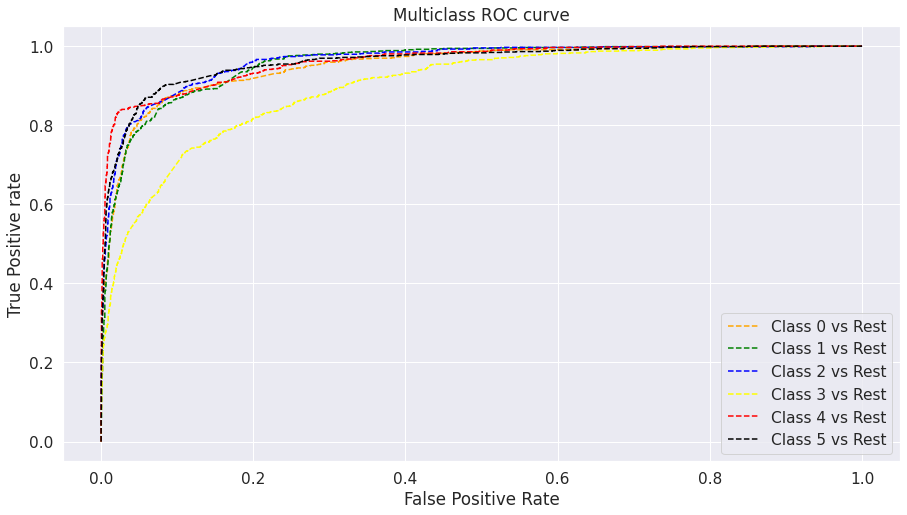

In [ ]:
plt.figure(figsize=(15,8))
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_boost, y_prob_pred_boost_test[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
pred_test_boost = model_boost.predict(X_test_boost)
pred_test_boost

array([3, 5, 4, ..., 2, 0, 5])

In [ ]:
# Confusion Matrix
cm_boost = confusion_matrix(y_test_boost, y_pred_boost_test)
cm_boost

array([[673,  20,   2, 110,  14,  71],
       [ 11, 666,   6, 200,   6,   6],
       [ 15,  20, 499, 139,   6,   7],
       [ 39,  93,  64, 657,  12,  16],
       [ 26,  17,  16, 122, 705,  34],
       [ 73,   9,   2, 101,  14, 753]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Confusion Matrix for XG boost classifier')

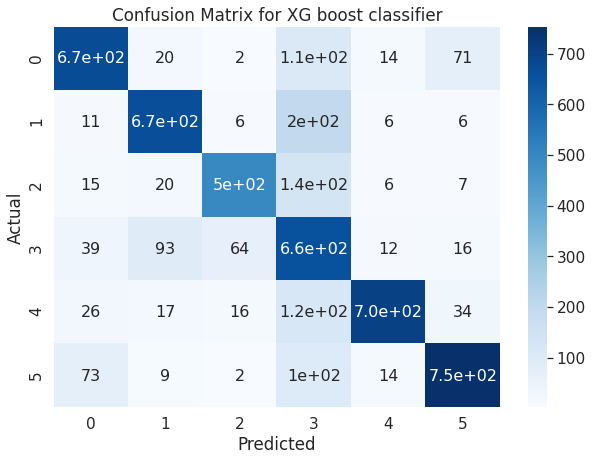

In [ ]:
data = confusion_matrix(y_test_boost, y_pred_boost_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_boost), index = np.unique(y_test_boost))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plt.title('Confusion Matrix for XG boost classifier')

In [ ]:
acc_table_cv_XG = classification_report(y_test_boost, y_pred_boost_test)
print(acc_table_cv_XG)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       890
           1       0.81      0.74      0.77       895
           2       0.85      0.73      0.78       686
           3       0.49      0.75      0.59       881
           4       0.93      0.77      0.84       920
           5       0.85      0.79      0.82       952

    accuracy                           0.76      5224
   macro avg       0.79      0.76      0.77      5224
weighted avg       0.79      0.76      0.77      5224



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into X and y
X = Vec
y = df_bal["Cat1"].values
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[17:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 81.47%


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

X = Vec
y = df_bal["Cat1"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

clf = xgb.XGBClassifier()

# param_grid = {
#         'silent': [False],
#         'max_depth': [6, 10, 15, 20],
#         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
#         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
#         'gamma': [0, 0.25, 0.5, 1.0],
#         'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
#         'n_estimators': [100]}

param_grid = {
        'silent': [False],
        'max_depth': [6, 10],
        'learning_rate': [0.001, 0.01],
        'subsample': [0.5, 0.6],
        'colsample_bytree': [0.4, 0.6],
        'colsample_bylevel': [0.4, 0.5],
        'min_child_weight': [0.5, 1.0],
        'gamma': [0, 0.25],
        'reg_lambda': [0.1, 1.0],
        'n_estimators': [100, 110]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=2,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=110, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0.25, colsample_bytree=0.4, colsample_bylevel=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=110, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0.25, colsample_bytree=0.4, colsample_bylevel=0.4, total=  16.5s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=110, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0.25, colsample_bytree=0.4, colsample_bylevel=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=110, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0.25, colsample_bytree=0.4, colsample_bylevel=0.4, total=  15.4s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.5 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.5, total=  41.1s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.5 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.5, total=  40.8s
Randomized search time: 113.72506952285767
Best score: -1.21426

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min finished


In [ ]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold, cross_validate
#from sklearn import cross_validation

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\Admin\anaconda3\lib\site-packages\sklearn\__init__.py)

# K-Fold cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits = 6)
kfold

KFold(n_splits=6, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 6)

In [ ]:
score_logit = []  # f1 score 
score_Naive = []
score_randomForest = []
score_DT = []
score_knn = []

#scoring = {'f1_score' : make_scorer(f1_score)}
scoring = cross_val_score()

for train_index, test_index in kfold.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],  y[train_index], y[test_index]

    score_logit.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
    score_Naive.append(get_score(MultinomialNB(),X_train, X_test, y_train, y_test))
    score_randomForest.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test)) 
    score_DT.append(get_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test))
    score_knn.append(get_score(KNeighborsClassifier(),X_train, X_test, y_train, y_test))  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
score_logit  
# max = 85.18 and min = 79.19  so varience between these two scores is 5.99

[0.8518074096295185,
 0.8315584220788961,
 0.815209239538023,
 0.8041097945102745,
 0.8063306330633063,
 0.791929192919292]

In [ ]:
score_Naive 
# max = 87.37 and min = 79.56  so varience between these two scores is 7.81

[0.8737063146842657,
 0.8383080845957702,
 0.8290085495725213,
 0.8180590970451478,
 0.8153315331533153,
 0.7956795679567957]

In [ ]:
score_randomForest 
# max = 81.98 and min = 73.85  so varience between these two scores is 8.13

[0.8198590070496475,
 0.7991600419979001,
 0.783410829458527,
 0.7724613769311535,
 0.7617761776177617,
 0.7385238523852385]

In [ ]:
score_DT 
# max = 70.13 and min = 63.80  so varience between these two scores is 6.33

[0.7013649317534123,
 0.6836658167091645,
 0.6743662816859157,
 0.6518674066296685,
 0.6543654365436543,
 0.638013801380138]

In [ ]:
score_knn 
# max = 52.39 and min = 46.02  so varience between these two scores is 6.37

[0.5239238038098095,
 0.5002249887505624,
 0.46107694615269235,
 0.463626818659067,
 0.4602460246024602,
 0.46234623462346236]

In [ ]:
kfolds = [['score_logit', 'score_Naive', 'score_randomForest', 'score_DT', 'score_knn']]

In [ ]:
kfolds_df = pd.DataFrame({'score_logit': [0.8518074096295185,0.8315584220788961,0.815209239538023,0.8041097945102745,0.8063306330633063,0.791929192919292],
                          'score_Naive': [0.8737063146842657,0.8383080845957702,0.8290085495725213,0.8180590970451478,0.8153315331533153,0.7956795679567957],
                          'score_randomForest': [0.8198590070496475,0.7991600419979001,0.783410829458527,0.7724613769311535,0.7617761776177617,0.7385238523852385],
                          'score_DT': [0.7013649317534123,0.6836658167091645,0.6743662816859157,0.6518674066296685,0.6543654365436543,0.638013801380138],
                          'score_knn': [0.5239238038098095,0.5002249887505624,0.46107694615269235,0.463626818659067,0.4602460246024602,0.46234623462346236]})

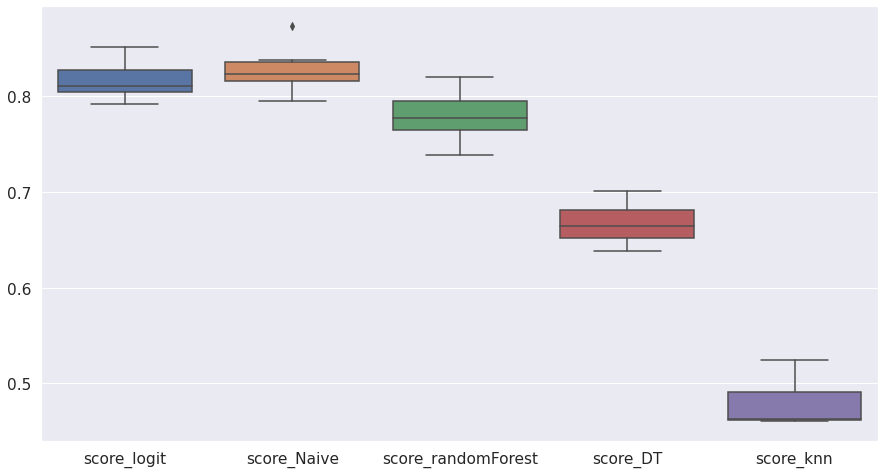

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(data = kfolds_df)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
X = Vec
y = df_bal["Cat1"].values

# K-fold Cross validation after balancing (Logistic Regression)

In [ ]:
kf = KFold(n_splits=6)
cv_Logistic =cross_val_score(LogisticRegression(), X_train, y_train, cv=5, scoring = 'f1_macro')

In [ ]:
cv_Logistic

array([0.71992724, 0.72200133, 0.71623071, 0.71870898, 0.73431146])

# K-fold Cross validation after balancing (Naive Bayes)

In [ ]:
kf = KFold(n_splits=6)
cv_Naive =cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring = 'f1_macro')
cv_Naive

array([0.7140434 , 0.71545742, 0.71593349, 0.7120154 , 0.70314168])

# K-fold Cross validation after balancing (Random Forest Classifier)

In [ ]:
kf = KFold(n_splits=6)
cv_RF =cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5, scoring = 'f1_macro')
cv_RF

array([0.67816061, 0.68435643, 0.68463413, 0.68310528, 0.66990977])

# K-fold Cross validation after balancing (Decision Tree Classifier)

In [ ]:
kf = KFold(n_splits=6)
cv_DT =cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring = 'f1_macro')
cv_DT

array([0.61811119, 0.59539368, 0.61714759, 0.59882525, 0.59077252])

# K-fold Cross validation after balancing (K-Neighbors Classifier)

In [ ]:
kf = KFold(n_splits=6)
cv_KNN =cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=8, scoring = 'f1_macro')
cv_KNN

array([0.70642841, 0.24564117, 0.60059416, 0.24942911, 0.2104361 ,
       0.21641631, 0.25260095, 0.63815343])

# K-fold Cross validation after balancing (Bagging Classifier)

In [ ]:
kf = KFold(n_splits=6)
cv_bagg =cross_val_score(BaggingClassifier(), X_train, y_train, cv=5, scoring = 'f1_macro')
cv_bagg

array([0.72930553, 0.71532035, 0.72570756, 0.72367497, 0.70826316])

# K-fold Cross validation after balancing (XG Boost Classifier)

In [ ]:
kf = KFold(n_splits=6)
cv_boost =cross_val_score(XGBClassifier(), X_train, y_train, cv=5, scoring = 'f1_macro')
cv_boost

array([0.77012446, 0.75068612, 0.75986215, 0.7519847 , 0.75351739])

In [ ]:
kfolds_df_bal = pd.DataFrame({'score_logit': [0.71992724, 0.72200133, 0.71623071, 0.71870898, 0.73431146],
                          'score_Naive': [0.7140434 , 0.71545742, 0.71593349, 0.7120154 , 0.70314168],
                          'score_randomForest': [0.67816061, 0.68435643, 0.68463413, 0.68310528, 0.66990977],
                          'score_DT': [0.61811119, 0.59539368, 0.61714759, 0.59882525, 0.59077252],
                          'score_bagging':[0.72930553, 0.71532035, 0.72570756, 0.72367497, 0.70826316],
                          'score_XGBoost':[0.77012446, 0.75068612, 0.75986215, 0.7519847 , 0.75351739]})

In [ ]:
kfolds_df_bal

,score_logit,score_Naive,score_randomForest,score_DT,score_bagging,score_XGBoost
0,0.719927,0.714043,0.678161,0.618111,0.729306,0.770124
1,0.722001,0.715457,0.684356,0.595394,0.715320,0.750686
2,0.716231,0.715933,0.684634,0.617148,0.725708,0.759862
3,0.718709,0.712015,0.683105,0.598825,0.723675,0.751985
4,0.734311,0.703142,0.669910,0.590773,0.708263,0.753517


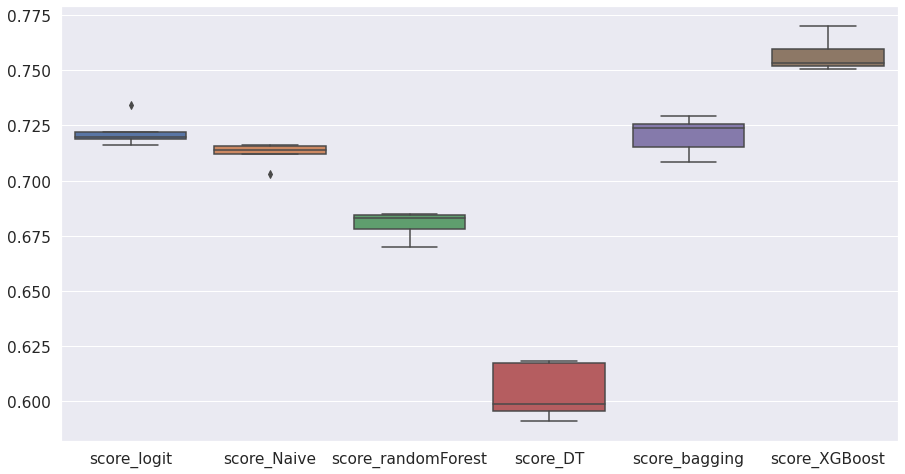

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.boxplot(data = kfolds_df_bal)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn import model_selection

In [ ]:
#models = []
#models.append(('LR', LogisticRegression()))
#models.append(('NB', MultinomialNB()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
#results = []
#names = []
#scoring = 'precision_macro'
#for name, model in models:
#	kfold = model_selection.KFold(n_splits=10, random_state=12345)
#	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
#	results.append(cv_results)
#	names.append(name)
#	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#	print(msg)
# boxplot algorithm comparison
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()

# Scores Table

In [ ]:
df_score = pd.DataFrame({'Models':['Logistic Regression TF-IDF','Logistic Regression Count_Vectorizer','Naive Bayes Count_Vectorizer','Random Forest Count_Vectorizer','Decision Tree Count_Vectorizer','KNN Count_Vectorizer'],
                         'F1_Score':[83.03,81.95,82.56,78.74,67.31,48.96],
                         'Recall_score':[83.78,83.37,82.32,76.61,67.03,49.19],
                         'precision_score':[82.82,81.17,82.89,82.15,67.65,54.25],
                         'roc_auc_score':[97.11,96.62,96.49,95.28,79.99,78.28],
                         'K-Fold score':[81.68,81.68,82.83,77.68,66.61,47.82],
                         'Training_Score':[90.40,89.25,87.29,99.86,99.86,66.21],
                         'Testing_Score':[83.2,81.98,82.72,79.02,67.4,50.0],
                         'Varience_train_test_score':[7.2,7.27,4.57,20.84,32.46,16.21]})

In [ ]:
df_score

,Models,F1_Score,Recall_score,precision_score,roc_auc_score,K-Fold score,Training_Score,Testing_Score,Varience_train_test_score
0,Logistic Regression TF-IDF,83.03,83.78,82.82,97.11,81.68,90.40,83.20,7.20
1,Logistic Regression Count_Vectorizer,81.95,83.37,81.17,96.62,81.68,89.25,81.98,7.27
2,Naive Bayes Count_Vectorizer,82.56,82.32,82.89,96.49,82.83,87.29,82.72,4.57
3,Random Forest Count_Vectorizer,78.74,76.61,82.15,95.28,77.68,99.86,79.02,20.84
4,Decision Tree Count_Vectorizer,67.31,67.03,67.65,79.99,NaN,99.86,67.40,32.46
5,KNN Count_Vectorizer,48.96,49.19,54.25,78.28,47.82,66.21,50.00,16.21
